# Vlad Novitskyi K-10, 8 variant

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Information about versions of libraries and Python

In [2]:
pd.__version__

'2.0.2'

In [3]:
matplotlib.__version__

'3.7.0'

In [4]:
import sys
sys.version

'3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]'

# Work with a dataframe

In [5]:
dataframe = pd.read_csv('weather.csv')
dataframe.columns = ["day", "cloudiness", "precipitation", "day air temperature", "night air temperature", "wind strength", "period"]


dataframe.rename(columns={'cloudiness': 'cloudiness, %'}, inplace=True)
dataframe.rename(columns={'precipitation': 'precipitation, m.m.'}, inplace=True)
dataframe.rename(columns={'day air temperature': 'day air temperature, °C'}, inplace=True)
dataframe.rename(columns={'night air temperature': 'night air temperature, °C'},inplace=True )
dataframe.rename(columns={'wind strength': 'wind strength, m/s'}, inplace=True)

dataframe['cloudiness, %'] = dataframe['cloudiness, %'].replace('%', '', regex=True)
dataframe['precipitation, m.m.'] = dataframe['precipitation, m.m.'].replace('м.м.', '', regex=True)
dataframe['precipitation, m.m.'] = dataframe['precipitation, m.m.'].replace('-', '0', regex=True)
dataframe['day air temperature, °C'] = dataframe['day air temperature, °C'].replace('°C', '', regex=True)
dataframe['night air temperature, °C'] = dataframe['night air temperature, °C'].replace('°C', '', regex=True)
dataframe['wind strength, m/s'] = dataframe['wind strength, m/s'].replace('м/с', '', regex=True)

dataframe['cloudiness, %'] = dataframe ['cloudiness, %'].astype(float)
dataframe['day air temperature, °C'] = dataframe ['day air temperature, °C'].astype(float)
dataframe['night air temperature, °C'] = dataframe ['night air temperature, °C'].astype(float)
dataframe['wind strength, m/s'] = dataframe ['wind strength, m/s'].astype(float)
dataframe['precipitation, m.m.'] = dataframe ['precipitation, m.m.'].astype(float)


dataframe['average deviation of temperatures'] = abs(dataframe['day air temperature, °C'] - dataframe['night air temperature, °C'])

In [6]:
p_df = dataframe[(dataframe['period'] == '2022-09')]

# TASK 1

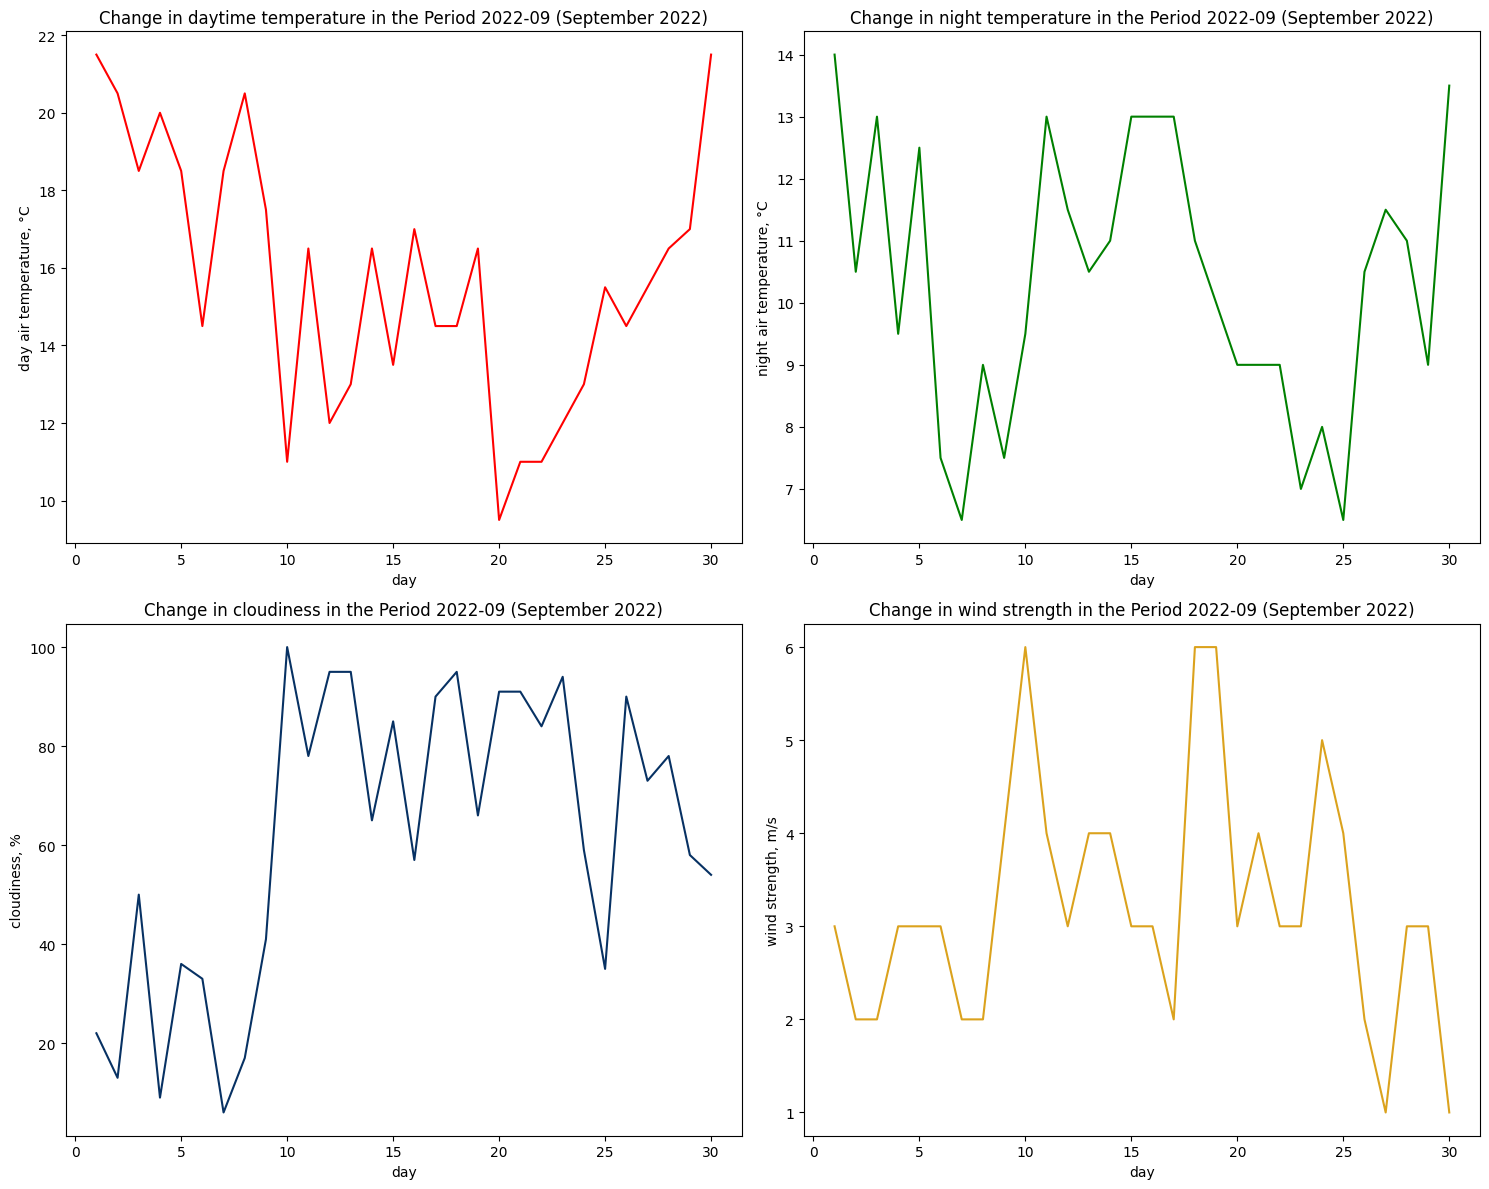

In [7]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.plot(p_df['day'], p_df['day air temperature, °C'], color = "Red")
plt.xlabel('day')
plt.ylabel('day air temperature, °C')
plt.title('Change in daytime temperature in the Period 2022-09 (September 2022)')

plt.subplot(2, 2, 2)
plt.plot(p_df['day'], p_df['night air temperature, °C'], color = "Green")
plt.xlabel('day')
plt.ylabel('night air temperature, °C')
plt.title('Change in night temperature in the Period 2022-09 (September 2022)')

plt.subplot(2, 2, 3)
plt.plot(p_df['day'], p_df['cloudiness, %'], color = "#073163")
plt.xlabel('day')
plt.ylabel('cloudiness, %')
plt.title('Change in cloudiness in the Period 2022-09 (September 2022)')

plt.subplot(2, 2, 4)
plt.plot(p_df['day'], p_df['wind strength, m/s'], color = "#dba21d")
plt.xlabel('day')
plt.ylabel('wind strength, m/s')
plt.title('Change in wind strength in the Period 2022-09 (September 2022)')

plt.tight_layout()
plt.show()


# TASK 2

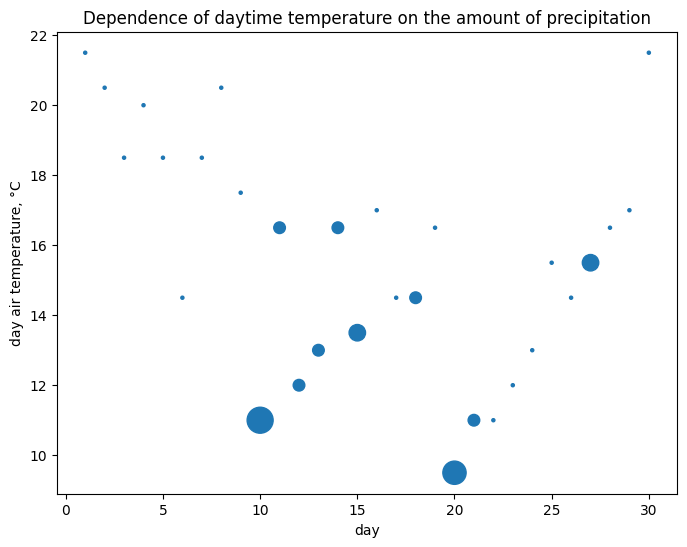

In [8]:
plt.figure(figsize=(8, 6))
diameters = p_df['precipitation, m.m.'].apply(lambda x: 70*x if x > 0 else 5)

plt.scatter(p_df['day'], p_df['day air temperature, °C'], s=diameters)
plt.xlabel('day')
plt.ylabel('day air temperature, °C')
plt.title('Dependence of daytime temperature on the amount of precipitation')

plt.show()


# TASK 3

In [9]:
for i, group in dataframe.groupby('period'):
    print(f"For the period {i}, the average deviation {group['average deviation of temperatures'].mean()}")


For the period 2022-05, the average deviation 7.451612903225806
For the period 2022-06, the average deviation 8.316666666666666
For the period 2022-07, the average deviation 8.693548387096774
For the period 2022-08, the average deviation 9.46774193548387
For the period 2022-09, the average deviation 5.416666666666667
For the period 2022-10, the average deviation 5.17741935483871
For the period 2022-11, the average deviation 3.2
For the period 2022-12, the average deviation 2.725806451612903
For the period 2023-01, the average deviation 2.8870967741935485
For the period 2023-02, the average deviation 3.125
For the period 2023-03, the average deviation 4.854838709677419
For the period 2023-04, the average deviation 4.416666666666667


# TASK 4


In [10]:
temp = abs(dataframe['day air temperature, °C'] - dataframe['night air temperature, °C'])
dataframe[temp == max(temp)]

,day,"cloudiness, %","precipitation, m.m.","day air temperature, °C","night air temperature, °C","wind strength, m/s",period,average deviation of temperatures
267,26,9.0,0.0,36.5,20.5,4.0,2022-08,16.0


# TASK 5

In [11]:
p_df.sort_values(by='wind strength, m/s', ascending=False).head(4)

,day,"cloudiness, %","precipitation, m.m.","day air temperature, °C","night air temperature, °C","wind strength, m/s",period,average deviation of temperatures
229,18,95.0,1.0,14.5,11.0,6.0,2022-09,3.5
221,10,100.0,5.0,11.0,9.5,6.0,2022-09,1.5
230,19,66.0,0.0,16.5,10.0,6.0,2022-09,6.5
235,24,59.0,0.0,13.0,8.0,5.0,2022-09,5.0


# TASK 6

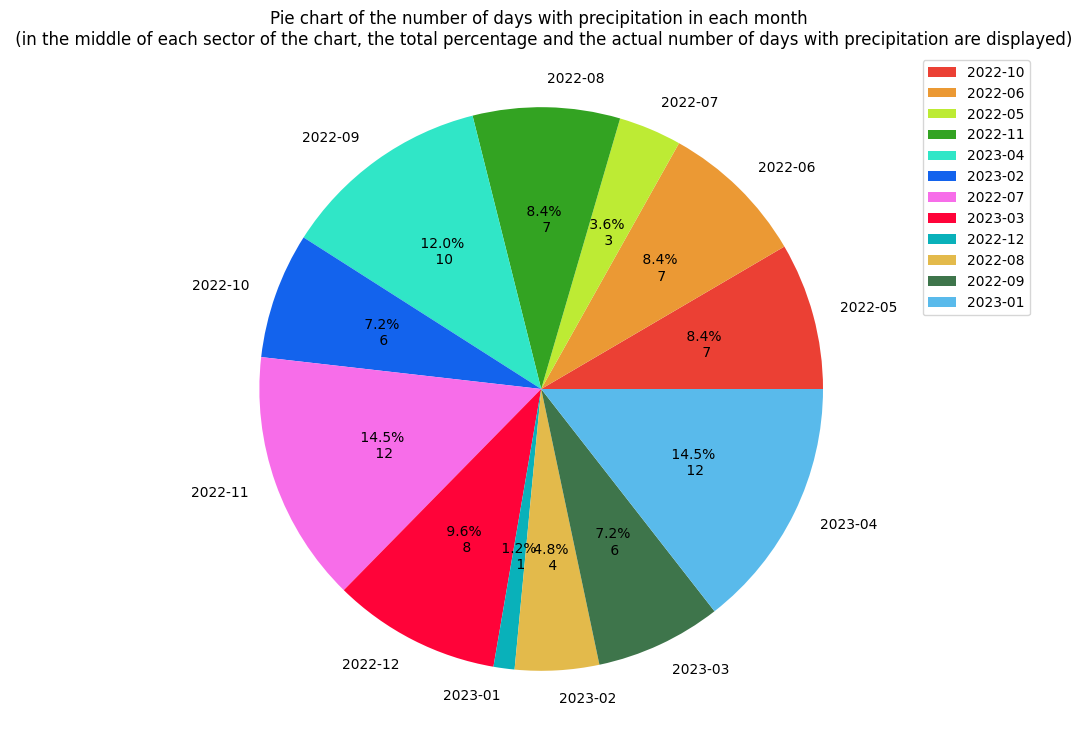

In [12]:
plt.figure(figsize=(8, 8))


dataframe['precipitation, m.m.'] = dataframe['precipitation, m.m.'].astype(float)


grouped_df = dataframe[dataframe['precipitation, m.m.'] > 0].groupby(dataframe['period'])['period'].count()

rain_days = grouped_df.values
color = ['#eb4034', '#eb9934', '#bdeb34', '#33a322', '#30e6c7', '#1363ed', '#f76de9', '#ff0339', '#09b1ba', '#e3ba4b','#3e754b', '#59baeb']
patches, texts, autotexts = plt.pie(rain_days , labels=sorted(set(dataframe['period'])), autopct='%1.0f%%', colors=color)
total_days = sum(rain_days)
for i, text in enumerate(autotexts):
    percentage = (rain_days[i] / total_days) * 100
    text.set_text(f" {percentage:.1f}% \n {rain_days[i]}")


plt.legend(patches, set(dataframe['period']), loc='upper right', bbox_to_anchor=(1.3, 1))
plt.subplots_adjust(top=0.95)

plt.axis('equal')
plt.title('Pie chart of the number of days with precipitation in each month \n (in the middle of each sector of the chart, the total percentage and the actual number of days with precipitation are displayed)')

plt.show()

# TASK 7

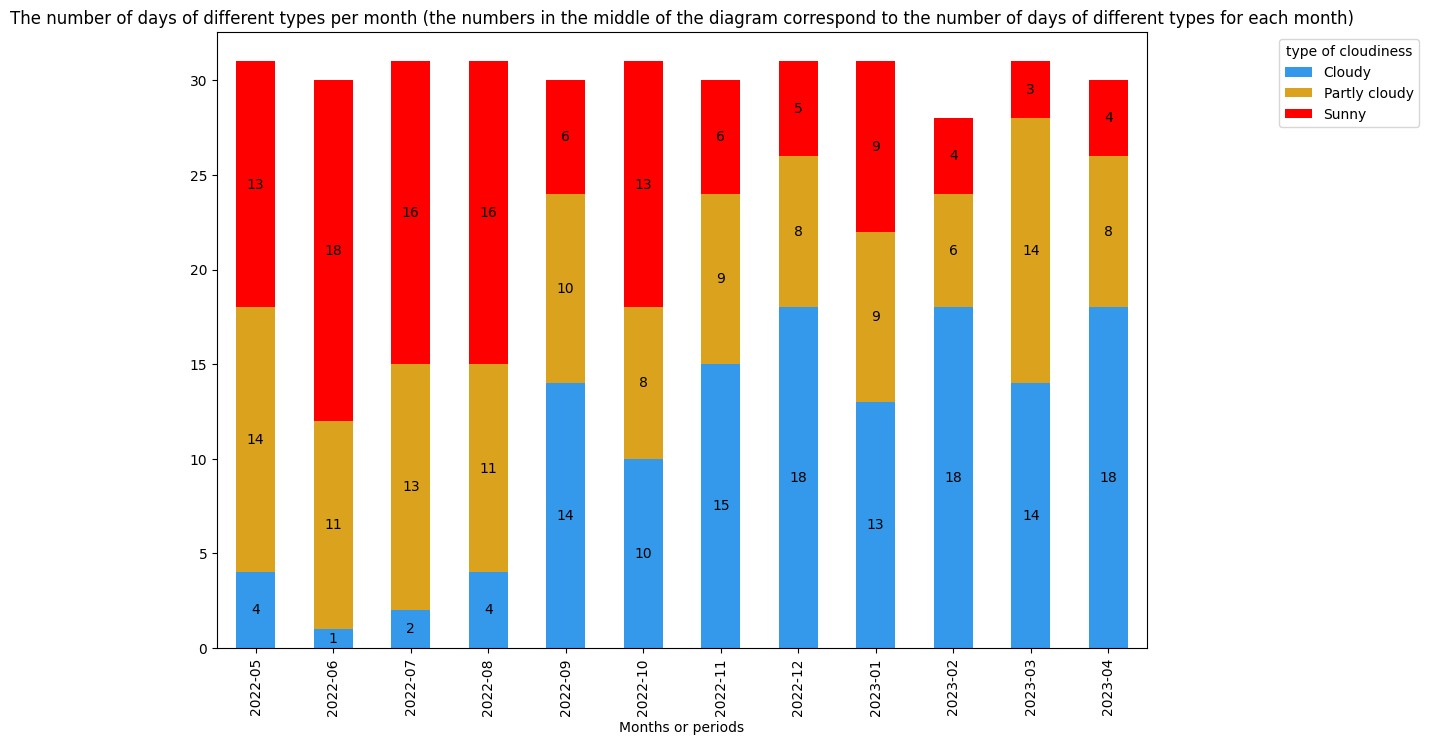

In [13]:
def day_type(c):
    if c > 70:
        return 'Cloudy'
    elif c < 35:
        return 'Sunny'
    else:
        return 'Partly cloudy'

dataframe['type of cloudiness'] = dataframe['cloudiness, %'].apply(day_type)

cl_df = dataframe.groupby(['period', 'type of cloudiness'])['type of cloudiness'].count().unstack().fillna(0)

ax = cl_df.plot(kind='bar', stacked=True, figsize=(12, 8), color=['#3498eb', '#dba21d',  'Red'])

ax.set_xlabel('Months or periods')
ax.set_title('The number of days of different types per month (the numbers in the middle of the diagram correspond to the number of days of different types for each month)')
for i, month in enumerate(cl_df.index):
    total = 0
    for j, value in enumerate(cl_df.iloc[i]):
        if value > 0:
            ax.text(i, total + value / 2, f"{int(value)}", ha='center', va='center')
            total += value

ax.legend(title='type of cloudiness', loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

# TASK 8

In [14]:
selected = dataframe[dataframe['type of cloudiness'] =='Sunny']
sunny_month  = selected.groupby('period')['period'].count()
rainy_days = dataframe[dataframe['precipitation, m.m.'] > 0]
rainy_month = rainy_days.groupby('period')['period'].count()
sunny_months = sunny_month [sunny_month  > rainy_month].index
for i in range(len(sunny_months)):
    print(f" A month in which there were more sunny days than rainy days - {sunny_months[i]}")

 A month in which there were more sunny days than rainy days - 2022-05
 A month in which there were more sunny days than rainy days - 2022-06
 A month in which there were more sunny days than rainy days - 2022-07
 A month in which there were more sunny days than rainy days - 2022-08
 A month in which there were more sunny days than rainy days - 2022-10
 A month in which there were more sunny days than rainy days - 2023-01


# TASK 9

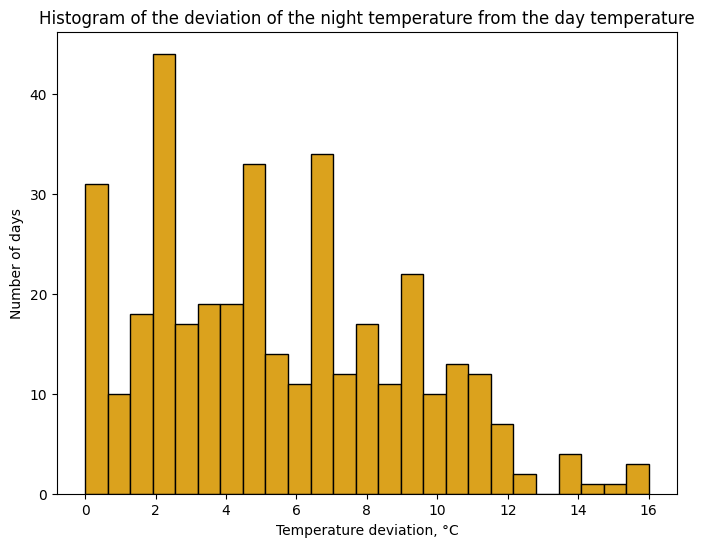

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(temp, bins=25, color='#dba21d', edgecolor='black')

plt.xlabel('Temperature deviation, °C')
plt.ylabel('Number of days')
plt.title('Histogram of the deviation of the night temperature from the day temperature')

plt.show()
